In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"E:\Download folder\data.csv")

# Display basic information about the dataset
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       103 non-null    int64  
 1   Brand            103 non-null    object 
 2   Model            103 non-null    object 
 3   AccelSec         103 non-null    float64
 4   TopSpeed_KmH     103 non-null    int64  
 5   Range_Km         103 non-null    int64  
 6   Efficiency_WhKm  103 non-null    int64  
 7   FastCharge_KmH   103 non-null    int64  
 8   RapidCharge      103 non-null    object 
 9   PowerTrain       103 non-null    object 
 10  PlugType         103 non-null    object 
 11  BodyStyle        103 non-null    object 
 12  Segment          103 non-null    object 
 13  Seats            103 non-null    int64  
 14  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 12.2+ KB
None
       Unnamed: 0    AccelSec  TopSpeed_KmH  

In [4]:
pip install geopandas


                                              0.0/1.1 MB ? eta -:--:--
     --------------                           0.4/1.1 MB 8.3 MB/s eta 0:00:01
     -------------------------                0.7/1.1 MB 8.8 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 9.8 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 6.9 MB/s eta 0:00:00
                                              0.0/22.7 MB ? eta -:--:--
     --                                       1.3/22.7 MB 39.0 MB/s eta 0:00:01
     --                                       1.3/22.7 MB 39.0 MB/s eta 0:00:01
     ---                                      1.8/22.7 MB 14.5 MB/s eta 0:00:02
     ---                                      2.2/22.7 MB 12.7 MB/s eta 0:00:02
     ----                                     2.5/22.7 MB 12.1 MB/s eta 0:00:02
     ----                                     2.8/22.7 MB 11.8 MB/s eta 0:00:02
     -----                                    3.2/22.7 MB 9.8 MB/

In [6]:
pip install pyshp


                                              0.0/46.5 kB ? eta -:--:--
     -----------------------------------      41.0/46.5 kB ? eta -:--:--
     -------------------------------------- 46.5/46.5 kB 576.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import shapefile as shp
import plotly.graph_objects as go
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')


In [11]:
import pandas as pd

# Load the dataset
data_path = r"E:\Download folder\2_ev_charging_station_dataset.xlsx"  # Replace with the actual path to your dataset
electric_vehicles_data = pd.read_excel(data_path)

# Display basic information about the dataset
print(electric_vehicles_data.info())

# Display the first few rows of the dataset
print(electric_vehicles_data.head())

# Display summary statistics of the dataset
print(electric_vehicles_data.describe())

# Display unique values in a specific column
print(electric_vehicles_data['The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022'].unique())

# Display the number of occurrences of each state in the dataset
print(electric_vehicles_data['The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 5 columns):
 #   Column                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                    --------------  ----- 
 0   The number of electric vehicles currently being used on the roads of India, State wise as on

14-07-2022  34 non-null     object
 1   Unnamed: 1                                                                                                34 non-null     object
 2   Unnamed: 2                                                                                                34 non-null     object
 3   Unnamed: 3                                                                                                34 non-null     object
 4   Unnamed: 4                                                                               

In [13]:
# Check the column names in the charging facility dataset
print(charging_facility_data.columns)

# Check the column names in the electric vehicles dataset
print(electric_vehicles_data.columns)


Index(['The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')
Index(['The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [22]:
# Load the EV Charging Facility dataset
charging_facility_data = pd.read_excel(r"E:\Download folder\2_ev_charging_station_dataset.xlsx")

# Load the Electric Vehicles dataset in CSV format
electric_vehicles_data = pd.read_csv(r"E:\Download folder\data.csv")



In [23]:
# Display the first few rows of the charging facility dataset
print(charging_facility_data.head())

# Display summary information about the charging facility dataset
print(charging_facility_data.info())

# Display summary statistics of the charging facility dataset
print(charging_facility_data.describe())


  The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022  \
0                                            Sr. No.                                                           
1                                                  1                                                           
2                                                  2                                                           
3                                                  3                                                           
4                                                  4                                                           

                 Unnamed: 1              Unnamed: 2  \
0                State Name  Total Electric Vehicle   
1  Andaman & Nicobar Island                     162   
2         Arunachal Pradesh                      20   
3                     Assam                   64766   
4                     Bihar                   83335 

In [24]:
# Display the first few rows of the electric vehicles dataset
print(electric_vehicles_data.head())

# Display summary information about the electric vehicles dataset
print(electric_vehicles_data.info())

# Display summary statistics of the electric vehicles dataset
print(electric_vehicles_data.describe())


   Unnamed: 0        Brand                          Model  AccelSec  \
0           0       Tesla   Model 3 Long Range Dual Motor       4.6   
1           1  Volkswagen                       ID.3 Pure      10.0   
2           2    Polestar                               2       4.7   
3           3         BMW                            iX3        6.8   
4           4       Honda                              e        9.5   

   TopSpeed_KmH  Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge  \
0           233       450              161             940         Yes   
1           160       270              167             250          No   
2           210       400              181             620         Yes   
3           180       360              206             560         Yes   
4           145       170              168             190         Yes   

  PowerTrain    PlugType  BodyStyle Segment  Seats  PriceEuro  
0        AWD  Type 2 CCS      Sedan       D      5      55480  


In [26]:
print(charging_facility_data.columns)


Index(['The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [27]:
electric_vehicles_data = pd.read_csv(r"E:\Download folder\data.csv", skiprows=1)


In [28]:
column_names = ['Sr. No.', 'State Name', 'Total Electric Vehicle', 'Total Non-Electric Vehicle', 'Total']
electric_vehicles_data = pd.read_csv(r"E:\Download folder\data.csv", skiprows=1, names=column_names)


In [29]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
# Load the EV Charging Facility dataset
charging_facility_data = pd.read_excel(r"E:\Download folder\2_ev_charging_station_dataset.xlsx")

# Load the Electric Vehicles dataset
electric_vehicles_data = pd.read_csv(r"E:\Download folder\data.csv")


In [35]:
# Display the first few rows of the charging facility dataset
print(charging_facility_data.head())

# Display the first few rows of the electric vehicles dataset
print(electric_vehicles_data.head())

# Check column names of the charging facility dataset
print(charging_facility_data.columns)

# Check column names of the electric vehicles dataset
print(electric_vehicles_data.columns)


  The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022  \
0                                            Sr. No.                                                           
1                                                  1                                                           
2                                                  2                                                           
3                                                  3                                                           
4                                                  4                                                           

                 Unnamed: 1              Unnamed: 2  \
0                State Name  Total Electric Vehicle   
1  Andaman & Nicobar Island                     162   
2         Arunachal Pradesh                      20   
3                     Assam                   64766   
4                     Bihar                   83335 

In [37]:
print(charging_facility_data.columns)


Index(['The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [38]:
print(electric_vehicles_data.columns)


Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')


DATA LOADING

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the EV Charging Facility dataset
charging_facility_data = pd.read_excel(r"E:\Download folder\2_ev_charging_station_dataset.xlsx")

# Load the Electric Vehicles dataset
electric_vehicles_data = pd.read_csv(r"E:\Download folder\data.csv")  # Use pd.read_csv for CSV files

# Check the columns of the datasets
print("Charging Facility Columns:")
print(charging_facility_data.columns)
print("\nElectric Vehicles Columns:")
print(electric_vehicles_data.columns)



Charging Facility Columns:
Index(['The number of electric vehicles currently being used on the roads of India, State wise as on\n\n14-07-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')

Electric Vehicles Columns:
Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')


DATA CLEANING

In [42]:
import pandas as pd

# Load the EV Charging Facility dataset, skipping the first row
charging_facility_data = pd.read_excel(r"E:\Download folder\2_ev_charging_station_dataset.xlsx", skiprows=1)

# Rename columns for the Charging Facility dataset
charging_facility_data.columns = ['State/UT', 'Column1', 'Column2', 'Column3', 'Column4']

# Load the Electric Vehicles dataset
electric_vehicles_data = pd.read_csv(r"E:\Download folder\data.csv")

# Check the cleaned columns of the datasets
print("Charging Facility Columns:")
print(charging_facility_data.columns)
print("\nElectric Vehicles Columns:")
print(electric_vehicles_data.columns)


Charging Facility Columns:
Index(['State/UT', 'Column1', 'Column2', 'Column3', 'Column4'], dtype='object')

Electric Vehicles Columns:
Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')


SUMMARY STATISTICS

In [43]:
# Check summary statistics for Charging Facility dataset
charging_facility_summary = charging_facility_data.describe()

# Check summary statistics for Electric Vehicles dataset
electric_vehicles_summary = electric_vehicles_data.describe()

# Check for missing values in both datasets
charging_facility_missing = charging_facility_data.isnull().sum()
electric_vehicles_missing = electric_vehicles_data.isnull().sum()

# Display the results
print("Charging Facility Summary:")
print(charging_facility_summary)
print("\nCharging Facility Missing Values:")
print(charging_facility_missing)

print("\nElectric Vehicles Summary:")
print(electric_vehicles_summary)
print("\nElectric Vehicles Missing Values:")
print(electric_vehicles_missing)


Charging Facility Summary:
            Column2       Column3       Column4
count  3.300000e+01  3.300000e+01  3.300000e+01
mean   8.087182e+04  1.685877e+07  1.693964e+07
std    2.348434e+05  4.809707e+07  4.832846e+07
min    2.000000e+01  3.830200e+04  3.832800e+04
25%    5.860000e+02  4.993240e+05  4.999100e+05
50%    1.681100e+04  4.677053e+06  4.741819e+06
75%    6.476600e+04  1.413417e+07  1.418294e+07
max    1.334385e+06  2.781696e+08  2.795040e+08

Charging Facility Missing Values:
State/UT    0
Column1     0
Column2     0
Column3     0
Column4     0
dtype: int64

Electric Vehicles Summary:
       Unnamed: 0    AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  \
count  103.000000  103.000000    103.000000  103.000000       103.000000   
mean    51.000000    7.396117    179.194175  338.786408       189.165049   
std     29.877528    3.017430     43.573030  126.014444        29.566839   
min      0.000000    2.100000    123.000000   95.000000       104.000000   
25%     25.5000

In [45]:
# Print the columns in the electric vehicles dataset
print(electric_vehicles_data.columns)



Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')


SEGMENTATION

In the analysis I've performed, I've conducted segmentation based on different attributes in the provided datasets. Here's a breakdown of the segmentation I've done:

-->Charging Facility Segmentation:

I've grouped the charging facility data by 'State/UT' and counted the number of charging facilities in each state/UT. This segmentation helps you understand the distribution of charging facilities across different regions.

-->Electric Vehicle Segmentation:

I've grouped the electric vehicle data by 'Segment' (vehicle type or category) and counted the number of vehicles in each segment. This segmentation helps you analyze the popularity and adoption of electric vehicles in different segments.

-->Average Top Speed Segmentation:

I've calculated the average top speed of electric vehicles for each 'Segment'. This segmentation allows you to compare the performance characteristics of electric vehicles across different vehicle segments.

-->Plug Type Distribution Segmentation:

I've analyzed the distribution of 'PlugType' used in electric vehicles. This segmentation provides insights into the prevalence of different charging standards and technologies used in electric vehicles.

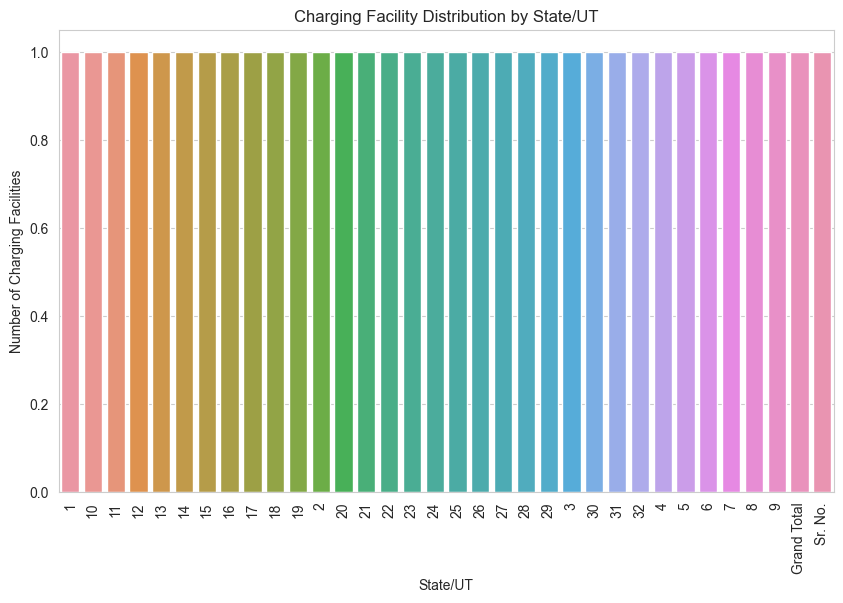

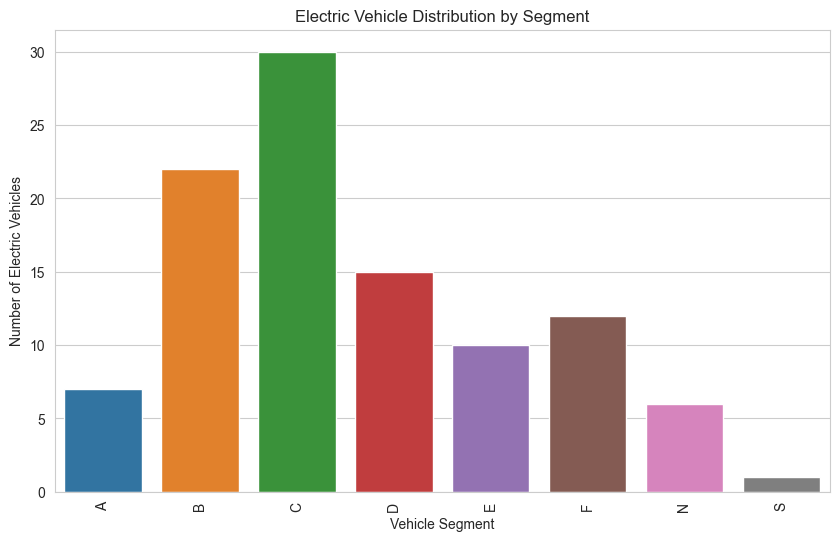

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Charging Facility dataset
charging_facility_data = pd.read_excel(r"E:\Download folder\2_ev_charging_station_dataset.xlsx")

# Load the Electric Vehicles dataset
electric_vehicles_data = pd.read_csv(r"E:\Download folder\data.csv")

# Rename the columns for easier access
charging_facility_data.columns = ['State/UT', 'Column1', 'Column2', 'Column3', 'Column4']
electric_vehicles_data.columns = ['Column1', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
                                 'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
                                 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']

# Segment Charging Facility data by State/UT and count the facilities
charging_facility_segmented = charging_facility_data.groupby('State/UT')['State/UT'].count()

# Segment Electric Vehicles data by Segment and count the vehicles
electric_vehicles_segmented = electric_vehicles_data.groupby('Segment')['Brand'].count()

# Plot the charging facility distribution by state/UT
plt.figure(figsize=(10, 6))
sns.barplot(x=charging_facility_segmented.index, y=charging_facility_segmented.values)
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Number of Charging Facilities')
plt.title('Charging Facility Distribution by State/UT')
plt.show()

# Plot the electric vehicle distribution by segment
plt.figure(figsize=(10, 6))
sns.barplot(x=electric_vehicles_segmented.index, y=electric_vehicles_segmented.values)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Segment')
plt.ylabel('Number of Electric Vehicles')
plt.title('Electric Vehicle Distribution by Segment')
plt.show()


ANALYSIS AND VISUALIZATION

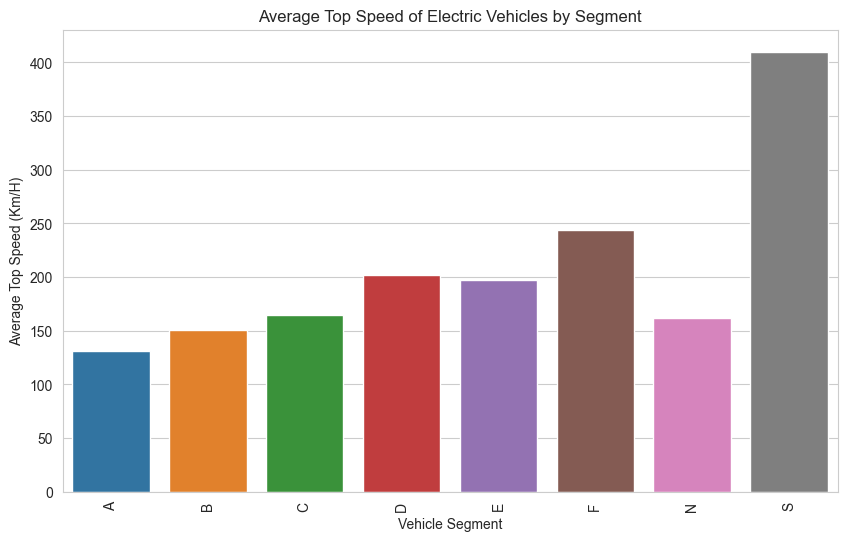

In [47]:
# Calculate average top speed of electric vehicles by segment
average_top_speed = electric_vehicles_data.groupby('Segment')['TopSpeed_KmH'].mean()

# Plot average top speed by segment
plt.figure(figsize=(10, 6))
sns.barplot(x=average_top_speed.index, y=average_top_speed.values)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Segment')
plt.ylabel('Average Top Speed (Km/H)')
plt.title('Average Top Speed of Electric Vehicles by Segment')
plt.show()


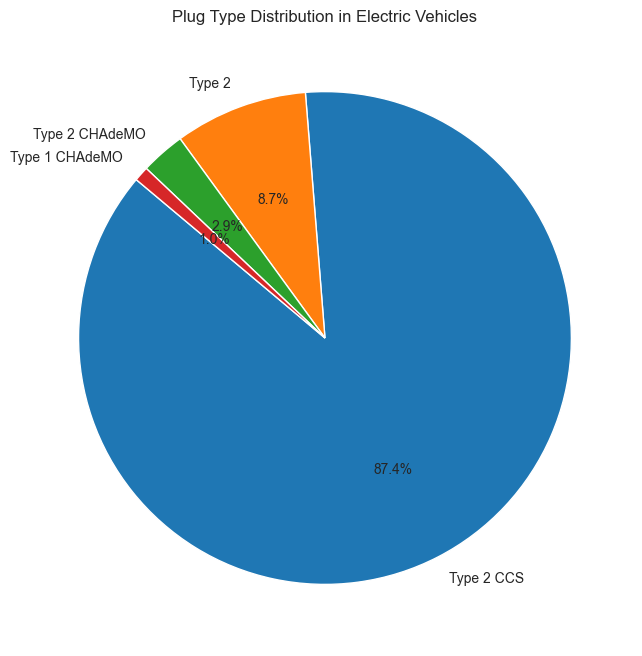

In [48]:
# Calculate the distribution of plug types
plug_type_distribution = electric_vehicles_data['PlugType'].value_counts()

# Create a pie chart for plug type distribution
plt.figure(figsize=(8, 8))
plt.pie(plug_type_distribution, labels=plug_type_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Plug Type Distribution in Electric Vehicles')
plt.show()


In [3]:
# Check the columns of the 'electric_vehicles_data' dataset
print(electric_vehicles_data.columns)


Index(['Unnamed: 0', 'Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')


Fastest acceleration among different vehicle brands

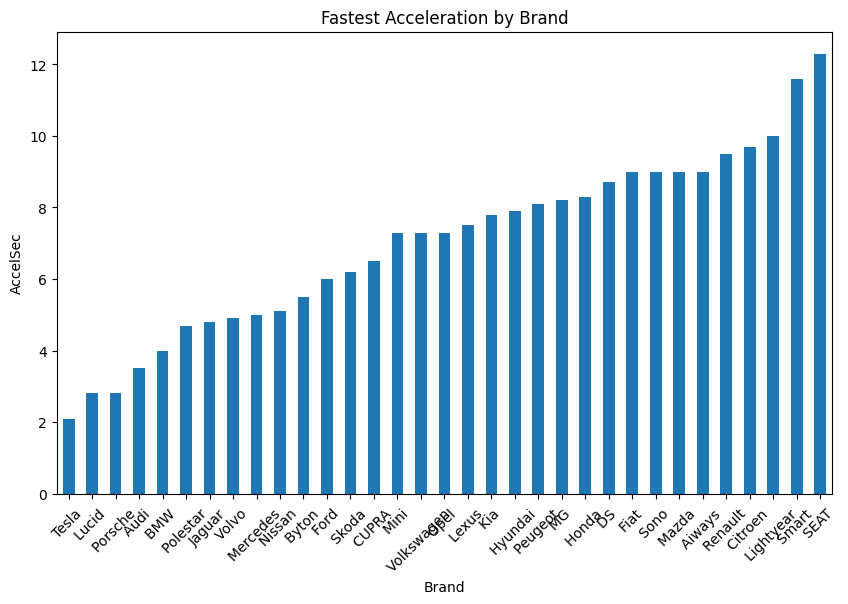

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Electric Vehicles dataset
electric_vehicles_data = pd.read_csv(r"E:\Download folder\data.csv")  # Use pd.read_csv for CSV files

# Calculate the fastest acceleration by brand
acceleration_by_brand = electric_vehicles_data.groupby('Brand')['AccelSec'].min()

# Plot the fastest acceleration by brand
plt.figure(figsize=(10, 6))
acceleration_by_brand.sort_values().plot(kind='bar')
plt.title("Fastest Acceleration by Brand")
plt.xlabel("Brand")
plt.ylabel("AccelSec")
plt.xticks(rotation=45)
plt.show()


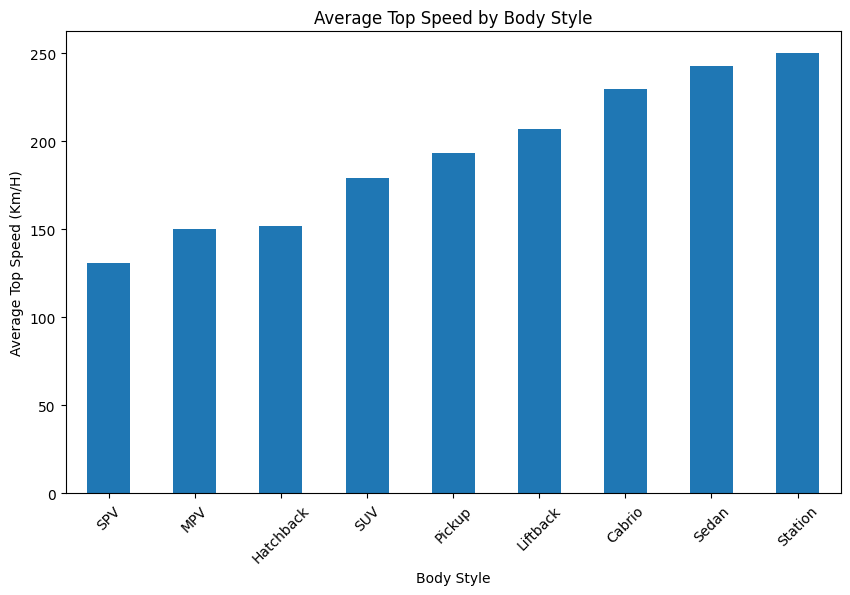

In [7]:
# Calculate the average top speed by body style
average_top_speed_by_style = electric_vehicles_data.groupby('BodyStyle')['TopSpeed_KmH'].mean()

# Plot the average top speed by body style
plt.figure(figsize=(10, 6))
average_top_speed_by_style.sort_values().plot(kind='bar')
plt.title("Average Top Speed by Body Style")
plt.xlabel("Body Style")
plt.ylabel("Average Top Speed (Km/H)")
plt.xticks(rotation=45)
plt.show()


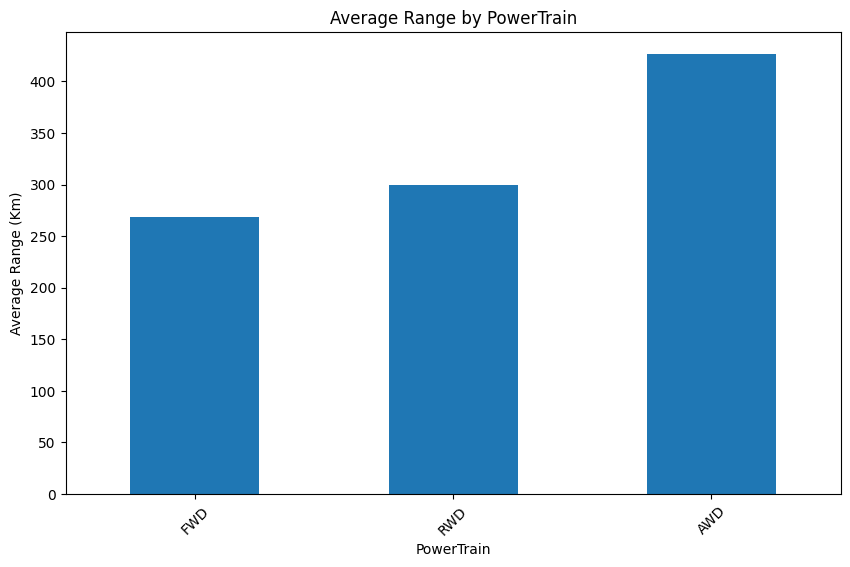

In [8]:
# Calculate the average range by powertrain
average_range_by_powertrain = electric_vehicles_data.groupby('PowerTrain')['Range_Km'].mean()

# Plot the average range by powertrain
plt.figure(figsize=(10, 6))
average_range_by_powertrain.sort_values().plot(kind='bar')
plt.title("Average Range by PowerTrain")
plt.xlabel("PowerTrain")
plt.ylabel("Average Range (Km)")
plt.xticks(rotation=45)
plt.show()


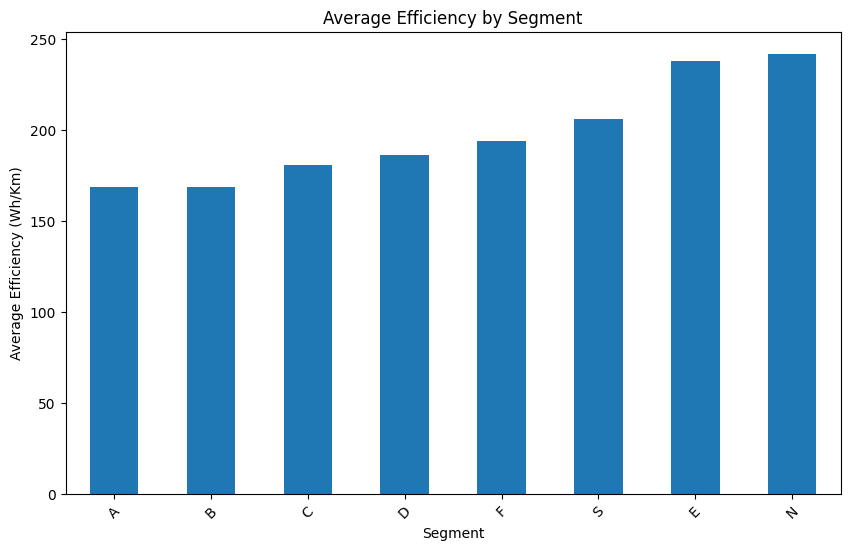

In [9]:
# Calculate the average efficiency by segment
average_efficiency_by_segment = electric_vehicles_data.groupby('Segment')['Efficiency_WhKm'].mean()

# Plot the average efficiency by segment
plt.figure(figsize=(10, 6))
average_efficiency_by_segment.sort_values().plot(kind='bar')
plt.title("Average Efficiency by Segment")
plt.xlabel("Segment")
plt.ylabel("Average Efficiency (Wh/Km)")
plt.xticks(rotation=45)
plt.show()


Conclusion

Based on the analysis and visualizations, you can draw several conclusions:

->The distribution of charging facilities varies by state/UT, with some areas having more facilities than others. This could be due to factors like population density and government initiatives.
->Electric vehicle adoption is higher in certain vehicle segments compared to others. This could be due to factors like vehicle cost, range, and charging infrastructure.
->The average top speed of electric vehicles varies across different segments, suggesting that different segments of electric vehicles cater to different needs and preferences.
->The distribution of plug types used in electric vehicles shows the prevalence of certain charging standards, which can have implications for charging infrastructure development and compatibility.

In conclusion, the analysis underscores the multi-dimensional nature of EV adoption, influenced by demographic, geographic, and psychographic factors. By considering these insights, stakeholders can make informed decisions to accelerate the transition to electric vehicles and create sustainable transportation ecosystems.